In [63]:
import pandas as pd
import numpy as np
import jieba
import re

In [4]:
!ls

ai_challenger_sentiment_analysis_testa_20180816
ai_challenger_sentiment_analysis_trainingset_20180816
ai_challenger_sentiment_analysis_validationset_20180816
sentiment_analysis.ipynb


In [20]:
train = pd.read_csv('./ai_challenger_sentiment_analysis_trainingset_20180816/sentiment_analysis_trainingset.csv')
valid = pd.read_csv('./ai_challenger_sentiment_analysis_validationset_20180816/sentiment_analysis_validationset.csv')

In [36]:
train.keys()

Index(['id', 'content', 'location_traffic_convenience',
       'location_distance_from_business_district', 'location_easy_to_find',
       'service_wait_time', 'service_waiters_attitude',
       'service_parking_convenience', 'service_serving_speed', 'price_level',
       'price_cost_effective', 'price_discount', 'environment_decoration',
       'environment_noise', 'environment_space', 'environment_cleaness',
       'dish_portion', 'dish_taste', 'dish_look', 'dish_recommendation',
       'others_overall_experience', 'others_willing_to_consume_again'],
      dtype='object')

In [14]:
location_list = ['location_traffic_convenience', 
                 'location_distance_from_business_district', 
                 'location_easy_to_find']

In [27]:
sum(list(train[location_list].values)[0])

-6

In [31]:
y_location = [0 if sum(score) == -6 else 1 for score in list(train[location_list].values)]

In [33]:
y_location[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 1]

In [38]:
service_list = ['service_wait_time', 
               'service_waiters_attitude', 
               'service_parking_convenience',
               'service_serving_speed']

In [43]:
y_service = [0 if sum(score) == -6 else 1 for score in list(train[service_list].values)]
y_service[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [44]:
price_list = ['price_level', 
              'price_cost_effective', 
              'price_discount']
y_price = [0 if sum(score) == -6 else 1 for score in list(train[price_list].values)]
y_price[:10]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [45]:
environment_list = [
    'environment_decoration',
    'environment_noise',
    'environment_space',
    'environment_cleaness',
]
y_env = [0 if sum(score) == -6 else 1 for score in list(train[environment_list].values)]
y_env[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [47]:
dish_list = [
    'dish_portion',
    'dish_taste',
    'dish_look',
    'dish_recommendation',
]
y_dish = [0 if sum(score) == -6 else 1 for score in list(train[dish_list].values)]
y_dish[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [49]:
others_list = [
    'others_overall_experience',
    'others_willing_to_consume_again'
]
y_other = [0 if sum(score) == -6 else 1 for score in list(train[others_list].values)]
y_other[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [54]:
y_train = np.array([y_location, y_service, y_env, y_dish, y_other]).T
y_train

array([[0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       ...,
       [0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1]])

In [62]:
content = train['content'].tolist()

In [87]:
def sentence_to_token(sentences):
    # remove extra character
    clean_sentences = [' '.join(re.findall(re.compile('[\w|\d|]+'), sen)) for sen in sentences]
    
    jieba.enable_parallel(4)
    
    tokens = [' '.join(jieba.cut(sen)) for sen in clean_sentences]
    return tokens

In [101]:
tokens = sentence_to_token(content)

In [99]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(tokens)

train_sequences = tokenizer.texts_to_sequences(tokens)

In [103]:
total_num = [len(token) for token in train_sequences]

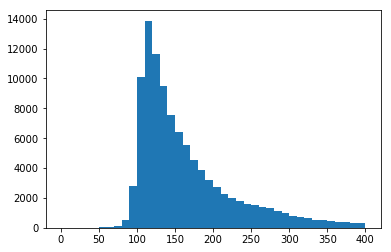

In [104]:
plt.hist(total_num,bins = np.arange(0,410,10))
plt.show()

In [105]:
train_sequences[0]

[7596,
 7492,
 25,
 1,
 13692,
 148,
 2,
 144,
 89,
 1,
 271,
 100,
 802,
 2,
 142,
 9,
 2641,
 51,
 13692,
 3,
 315,
 79,
 147,
 144,
 89,
 56,
 2,
 10,
 51,
 32,
 7080,
 1,
 417,
 98,
 459,
 13692,
 3,
 92,
 3495,
 1087,
 81,
 1,
 126,
 1195,
 582,
 1,
 1021,
 3,
 989,
 1,
 91,
 2446,
 2412,
 2098,
 1789,
 3521,
 2,
 14,
 19,
 181,
 14297,
 19,
 181,
 7688,
 10,
 3,
 468,
 448,
 1,
 5660,
 964,
 192,
 2,
 1058,
 56,
 5660,
 6785,
 1,
 1021,
 88,
 2,
 1285,
 5660,
 9,
 763,
 10,
 19,
 19218,
 2,
 22,
 8145,
 1,
 130,
 599,
 5660,
 1,
 206,
 7,
 49,
 1824,
 36,
 21,
 1382,
 5660,
 207,
 10,
 211,
 802,
 1,
 147,
 100,
 38,
 2,
 72,
 1520,
 18252,
 59]